<a href="https://colab.research.google.com/github/RainaVardhan/Data-Science-Systems-HW-Labs/blob/main/VizHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Top_Highest_Openings.csv', low_memory = False)
df.head()

,Release,Opening,Total Gross,% of Total,Theaters,Average,Date,Distributor
0,Avengers: Endgame,357115007,858373000,41.6,4662,76601,26-04-2019,Walt Disney Studios Motion Pictures
1,Spider-Man: No Way Home,260138569,804793477,32.3,4336,59995,17-12-2021,Sony Pictures Releasing
2,Avengers: Infinity War,257698183,678815482,38.0,4474,57599,27-04-2018,Walt Disney Studios Motion Pictures
3,Star Wars: Episode VII - The Force Awakens,247966675,936662225,26.5,4134,59982,18-12-2015,Walt Disney Studios Motion Pictures
4,Star Wars: Episode VIII - The Last Jedi,220009584,620181382,35.5,4232,51987,15-12-2017,Walt Disney Studios Motion Pictures


In [218]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df.head()

,Release,Opening,Total Gross,% of Total,Theaters,Average,Date,Distributor,Year
0,Avengers: Endgame,357115007,858373000,41.6,4662,76601,2019-04-26,Walt Disney Studios Motion Pictures,2019
1,Spider-Man: No Way Home,260138569,804793477,32.3,4336,59995,2021-12-17,Sony Pictures Releasing,2021
2,Avengers: Infinity War,257698183,678815482,38.0,4474,57599,2018-04-27,Walt Disney Studios Motion Pictures,2018
3,Star Wars: Episode VII - The Force Awakens,247966675,936662225,26.5,4134,59982,2015-12-18,Walt Disney Studios Motion Pictures,2015
4,Star Wars: Episode VIII - The Last Jedi,220009584,620181382,35.5,4232,51987,2017-12-15,Walt Disney Studios Motion Pictures,2017


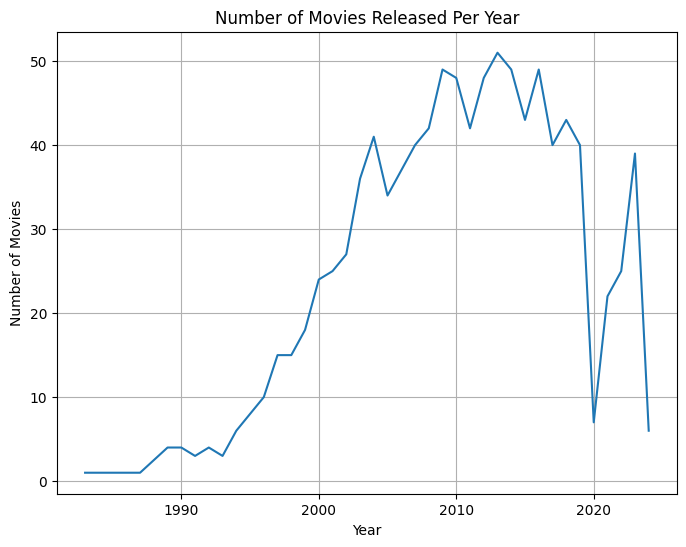

In [219]:
year_count = df.groupby('Year').size()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(year_count.index, year_count.values)
ax.set_title('Number of Movies Released Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies')
ax.grid(True)

In [220]:
df['Distributor'].unique()

array(['Walt Disney Studios Motion Pictures', 'Sony Pictures Releasing',
       'Universal Pictures', 'Warner Bros.', 'Lionsgate Films',
       'Summit Entertainment', '20th Century Studios',
       'Twentieth Century Fox', 'Paramount Pictures', 'DreamWorks',
       'Columbia Pictures', 'DreamWorks Distribution', '-',
       'Newmarket Films', 'Universal Pictures International',
       'New Line Cinema', 'United Artists Releasing',
       'Metro-Goldwyn-Mayer', 'Dimension Films', 'Revolution Studios',
       'Miramax', 'Screen Gems', 'FilmDistrict', 'The Weinstein Company',
       'TriStar Pictures', 'STX Entertainment', 'Relativity Media',
       'Focus Features'], dtype=object)

In [221]:
df = df.loc[~(df['Distributor'] == '-')]
df['Distributor'].unique()

array(['Walt Disney Studios Motion Pictures', 'Sony Pictures Releasing',
       'Universal Pictures', 'Warner Bros.', 'Lionsgate Films',
       'Summit Entertainment', '20th Century Studios',
       'Twentieth Century Fox', 'Paramount Pictures', 'DreamWorks',
       'Columbia Pictures', 'DreamWorks Distribution', 'Newmarket Films',
       'Universal Pictures International', 'New Line Cinema',
       'United Artists Releasing', 'Metro-Goldwyn-Mayer',
       'Dimension Films', 'Revolution Studios', 'Miramax', 'Screen Gems',
       'FilmDistrict', 'The Weinstein Company', 'TriStar Pictures',
       'STX Entertainment', 'Relativity Media', 'Focus Features'],
      dtype=object)

Text(0.5, 1.0, 'Total Gross Per Distributor')

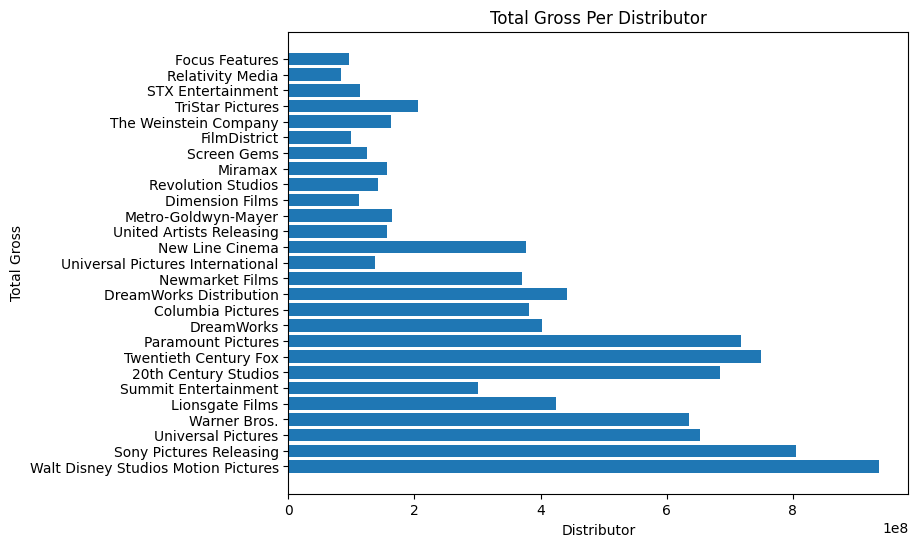

In [222]:
distributor = df['Distributor']
total_gross = df['Total Gross']

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(distributor, total_gross)
ax.set_xlabel('Distributor')
ax.set_ylabel('Total Gross')
ax.set_title('Total Gross Per Distributor')

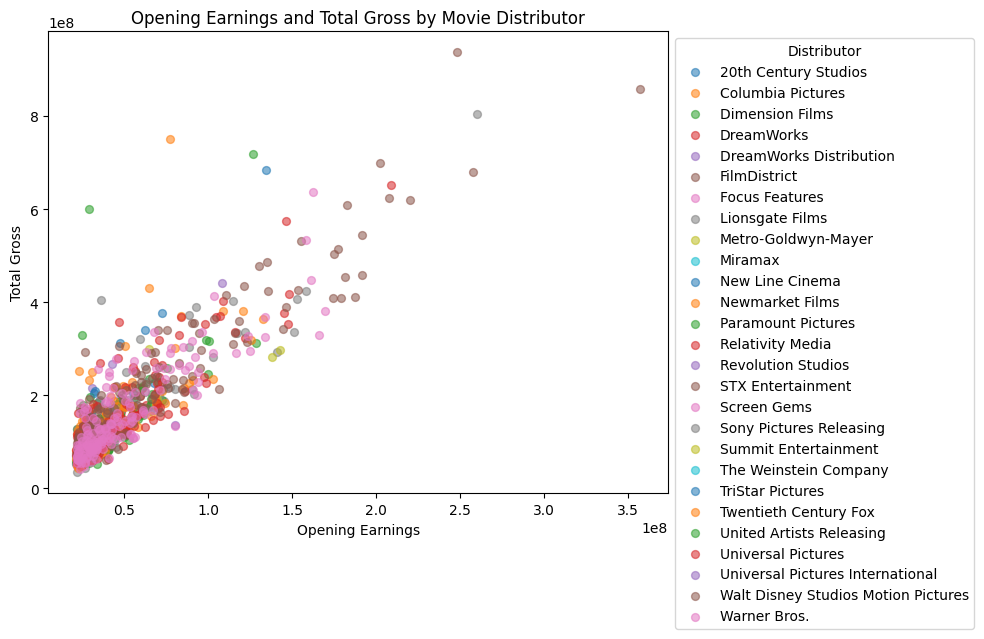

In [223]:
grouped = df.groupby('Distributor')

fig, ax = plt.subplots(figsize=(8, 6))
for distributor, group in df.groupby('Distributor'):
  opening = group['Opening']
  total_gross = group['Total Gross']
  ax.scatter(opening, total_gross, label=distributor, s=32, alpha=0.55)

ax.set_title('Opening Earnings and Total Gross by Movie Distributor')
ax.set_xlabel('Opening Earnings')
ax.set_ylabel('Total Gross')
ax.legend(title='Distributor', loc='upper left', bbox_to_anchor=(1,1))